## Тема урока: вложенные списки
1. Создание вложенных списков
2. Считывание вложенных списков
3. Перебор элементов вложенных списков
4. Обработка вложенных списков
5. Вывод вложенных списков

### Создание вложенных списков
Для создания вложенного списка можно использовать **литеральную** форму записи – перечисление элементов через запятую в квадратных скобках:

In [1]:
my_list = [[0], [1, 2], [3, 4, 5]]

Иногда нужно создать вложенный список, заполненный по определенному правилу – шаблону. Например, список длиной n, содержащий списки длиной m, каждый из которых заполнен нулями.

Рассмотрим несколько способов решения задачи.

**Способ 1**. Создадим пустой список, потом n раз добавим в него новый элемент – список длины m, составленный из нулей:

In [2]:
n, m = 3, 5    # считываем значения n и m
my_list = []

for _ in range(n):
    my_list.append([0] * m)

print(my_list)

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]


**Способ 2**. Сначала создадим список из n элементов (для начала просто из n нулей). Затем сделаем каждый элемент списка ссылкой на другой список из m элементов, заполненный нулями:

In [3]:
n, m = 3, 5    # считываем значения n и m
my_list = [0] * n

for i in range(n):
    my_list[i] = [0] * m

print(my_list)

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]


**Способ 3**. Можно использовать генератор списка: создадим список из n элементов, каждый из которых будет списком, состоящих из m нулей:

In [4]:
n, m = 3, 5    # считываем значения n и m

my_list = [[0] * m for _ in range(n)]

print(my_list)

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]


В этом случае каждый элемент создается независимо от остальных (заново конструируется вложенный список [0] * m для заполнения очередного элемента списка).

**Обратите внимание**, что очевидное решение, использующее операцию умножения списка на число (операция повторения) оказывается неверным:

In [7]:
n, m = 5, 3    # считываем значения n и m

my_list = [[0] * m ] * n

print(my_list)

[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]


В этом легко убедиться, если присвоить элементу my_list[0][0] любое значение, например, 17, а затем вывести список на печать:

In [8]:
my_list[0][0] = 17

print(my_list)

[[17, 0, 0], [17, 0, 0], [17, 0, 0], [17, 0, 0], [17, 0, 0]]


То есть, изменив значение элемента списка my_list[0][0] мы также изменили значения элементов my_list[1][0], my_list[2][0], my_list[3][0], my_list[4][0].

**Причина в самой природе списков (тип  list)**. В Python **списки – ссылочный тип данных**. Конструкция [0] * m возвращает ccылку на список из m нулей. Повторение этого элемента создает список из n ссылок на один и тот же список.

Вложенный список нельзя создать при помощи операции повторения (умножения списка на число). Для корректного создания вложенного списка мы используем способы 1 - 3, отдавая предпочтение способу 3.

### Считывание вложенных списков
Если элементы списка вводятся через клавиатуру (каждая строка на отдельной строке, всего n строк, числа в строке разделяются пробелами), для ввода списка можно использовать следующий код:

In [10]:
n = 4                                          # количество строк (элементов)
my_list = []

for _ in range(n):
    elem = [int(i) for i in input().split()]   # создаем список из элементов строки
    my_list.append(elem)

2 4
6 7 8 9
1 3
5 6 5 4 3 1


В этом примере мы используем списочный метод append(), передавая ему в качестве аргумента другой список. Так у нас получается список списков.

то в переменной my_list будет храниться список:

In [11]:
my_list

[[2, 4], [6, 7, 8, 9], [1, 3], [5, 6, 5, 4, 3, 1]]

Не забывайте, что метод split() возвращает список строк, а не чисел. Поэтому мы предварительно сконвертировали строку в число, с помощью вызова функции int().

Также, следует помнить **отличие работы списочных методов append() и extend().**

Следующий код:

In [12]:
n = 4
my_list = []

for _ in range(n):
    elem = [int(i) for i in input().split()]
    my_list.extend(elem)
my_list

2 4
6 7 8 9
1 3
5 6 5 4 3 1


[2, 4, 6, 7, 8, 9, 1, 3, 5, 6, 5, 4, 3, 1]

**создает одномерный (!) список, а не вложенный.**

### Перебор и вывод элементов вложенного списка
Как мы уже знаем для доступа к элементу списка указывают индекс этого элемента в квадратных скобках. В случае двумерных вложенных списков надо указать два индекса (каждый в отдельных квадратных скобках), в случае трехмерного списка — три индекса и т. д.

Рассмотрим программный код:

In [13]:
my_list = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

print(my_list[0][0])
print(my_list[1][2])
print(my_list[2][1])

1
6
8


Когда нужно перебрать все элементы вложенного списка (например, чтобы вывести их на экран), обычно используются **вложенные циклы**.

In [16]:
my_list = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

for i in range(len(my_list)):
    for j in range(len(my_list[i])):
        print(my_list[i][j], end=' ')   # используем необязательный параметр end
    print()                             # перенос на новую строку

1 2 3 
4 5 6 
7 8 9 


Вызов функции **print()** с пустыми параметрами нужен для того, чтобы переносить вывод на новую строку, после того как будет распечатан очередной элемент (список) вложенного списка.

В предыдущем примере мы **перебирали индексы** элементов, а можно сразу перебирать сами элементы вложенного списка:

In [19]:
my_list = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

for row in my_list:
    for elem in row:
        print(elem, end=' ')
    print()

1 2 3 
4 5 6 
7 8 9 


Перебор элементов вложенного списка по индексам дает нам больше гибкости для вывода данных. Например, **поменяв порядок переменных** i и j мы получаем иной тип вывода:

In [20]:
my_list = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

for i in range(len(my_list)):
    for j in range(len(my_list[i])):
        print(my_list[j][i], end=' ')    # выводим my_list[j][i] вместо my_list[i][j]
    print()

1 4 7 
2 5 8 
3 6 9 


### Обработка вложенных списков
Для обработки элементов вложенного списка, так же как и для вывода его элементов на экран, как правило используются **вложенные циклы**.

Используем вложенный цикл для подсчета суммы всех чисел в списке:

In [21]:
my_list = [[1, 9, 8, 7, 4], [7, 3, 4], [2, 1]]

total = 0
for i in range(len(my_list)):
    for j in range(len(my_list[i])):
        total += my_list[i][j]
print(total)

46


Или то же самое с циклом не по индексу, а **по значениям**:

In [22]:
my_list = [[1, 9, 8, 7, 4], [7, 3, 4], [2, 1]]

total = 0
for row in my_list:
    for elem in row:
        total += elem
print(total)

46


Таким образом можно обработать элементы вложенного списка практически в любом языке программирования. В Python, однако можно упростить код, если **использовать встроенную функцию sum()**, которая принимает список чисел и возвращает его сумму. Подсчет суммы с помощью функции sum() выглядит так:

In [24]:
my_list = [[1, 9, 8, 7, 4], [7, 3, 4], [2, 1]]

total = 0
for row in my_list:      # в один цикл
    total += sum(row)
print(total)

46


Названия переменных **row (строка) и elem (элемент)** удобно использовать при переборе вложенного списка по значениям. Названия переменных **i и j** используются при переборе вложенного списка по индексам.

## ЗАДАЧИ

##### Что покажет приведенный ниже фрагмент кода?

In [25]:
list1 = [[1, 2, 3], [4, 5]]
list2 = list1

list1[0].append(7)

print(list2)

[[1, 2, 3, 7], [4, 5]]


In [27]:
list1 = [[1] * 3] * 3
list1[0][1] = 5
list1

[[1, 5, 1], [1, 5, 1], [1, 5, 1]]

Какой тип данных будет у переменной row?

ответ: list

In [29]:
my_list = [[1], [2, 3], [4, 5, 6]]
total = 0

for row in my_list:
    total += sum(row)

print(total)

21


In [35]:
my_list = [[12, 221, 3], [41, 5, 633], [71, 8, 99]]

maximum = my_list[0][0]
minimum = my_list[0][0]

for row in my_list:
    maximum = max(row)
    minimum = min(row)

print(maximum + minimum)

#  Итоговый print() не относиться к циклу for (находиться вне тела цикла), 
#  а посему будет выведена сумма максимума и минимума в последнем элементе списка.

107


##### Вот как считается maximum и minimum в спиcке

In [36]:
my_list = [[12, 221, 3], [41, 5, 633], [71, 8, 99]]

maximum = my_list[0][0]
minimum = my_list[0][0]

for row in my_list:
    if max(row) > maximum:
        maximum = max(row)
    if min(row) < minimum:
        minimum = min(row)

print(maximum + minimum)

636


### Список по образцу 1
На вход программе подается число n. Напишите программу, которая создает и выводит построчно список, состоящий из n списков [[1, 2, ..., n], [1, 2, ..., n], ..., [1, 2, ..., n]].

Формат входных данных
На вход программе подается натуральное число n.

Формат выходных данных
Программа должна вывести построчно указанный список.

In [56]:
n = 3

my_list = []

for i in range(n):
    my_list.append([j for j in range(1, n+1)])

print(*my_list, sep = '\n')

[1, 2, 3]
[1, 2, 3]
[1, 2, 3]


In [1]:
n = 3
result = []

for _ in range(n):
    result.append(list(range(1, n + 1)))

print(*result, sep='\n')

[1, 2, 3]
[1, 2, 3]
[1, 2, 3]


### Список по образцу 2
На вход программе подается число n. Напишите программу, которая создает и выводит построчно вложенный список, состоящий из n списков [[1], [1, 2], [1, 2, 3], ..., [1, 2, ..., n]].

In [32]:
n = 4
result = []
for i in range(1, n + 1):
    result.append(list(range(1, i + 1)))

print(*result, sep='\n')

[1]
[1, 2]
[1, 2, 3]
[1, 2, 3, 4]


### Треугольник Паскаля 1 🌶️
Треугольник Паскаля — бесконечная таблица биномиальных коэффициентов, имеющая треугольную форму. В этом треугольнике на вершине и по бокам стоят единицы. Каждое число равно сумме двух расположенных над ним чисел.

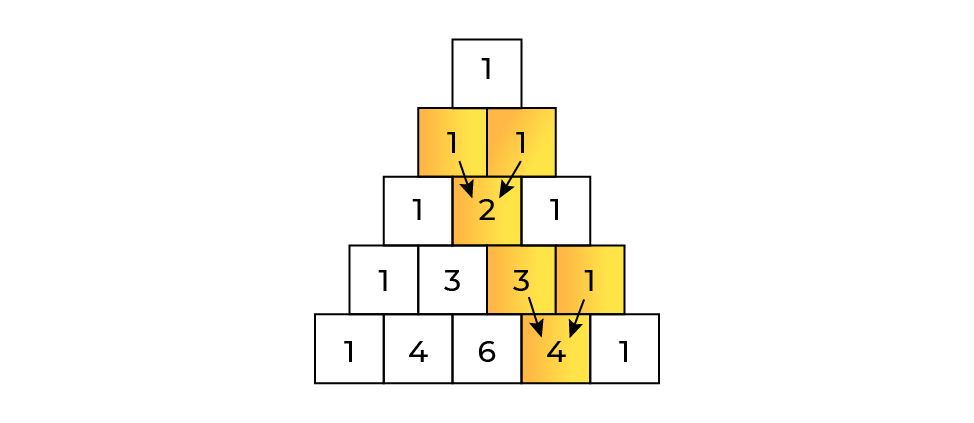

На вход программе подается число n(n≥0). Напишите программу, которая возвращает указанную строку треугольника Паскаля в виде списка (нумерация строк начинается с нуля).

Программа должна вывести указанную строку треугольника Паскаля в виде списка.

Примечание 1. Решение удобно оформить в виде функции pascal(), которая принимает номер строки и возвращает соответствующую строку треугольника Паскаля.

In [38]:
def pascal(rows):
    row = [1]
    for i in range(rows):
        print(row)
        row = [sum(x) for x in zip([0]+row, row+[0])]
        
pascal(10)

[1]
[1, 1]
[1, 2, 1]
[1, 3, 3, 1]
[1, 4, 6, 4, 1]
[1, 5, 10, 10, 5, 1]
[1, 6, 15, 20, 15, 6, 1]
[1, 7, 21, 35, 35, 21, 7, 1]
[1, 8, 28, 56, 70, 56, 28, 8, 1]
[1, 9, 36, 84, 126, 126, 84, 36, 9, 1]


In [50]:
def pascal(row):
    row = [1] + row
    for i in range(1, len(row)-1):
        row[i] += row[i+1]
    return row

row = [1]

for i in range(7):     #  range(int(input()))
    row = pascal(row)
print(row)

[1, 7, 21, 35, 35, 21, 7, 1]


In [52]:
a = [1]
for i in range(7):      #  range(int(input()))
    a = [x + y for x, y in zip([*a, 0], [0, *a])]
print(a)

[1, 7, 21, 35, 35, 21, 7, 1]


### Треугольник Паскаля 2
На вход программе подается натуральное число n (n≥1). Напишите программу, которая выводит первые n строк треугольника Паскаля.

In [82]:
a = [1]
for i in range(7): #  range(int(input()))
    print(*a)
    a = [x + y for x, y in zip([*a, 0], [0, *a])]

1
1 1
1 2 1
1 3 3 1
1 4 6 4 1
1 5 10 10 5 1
1 6 15 20 15 6 1


### Упаковка дубликатов 🌶️
На вход программе подается строка текста, содержащая символы. Напишите программу, которая упаковывает последовательности одинаковых символов заданной строки в подсписки.

In [94]:
s = 'g i v e t h h i i s m a a a n a g u u n'.split()
s

['g',
 'i',
 'v',
 'e',
 't',
 'h',
 'h',
 'i',
 'i',
 's',
 'm',
 'a',
 'a',
 'a',
 'n',
 'a',
 'g',
 'u',
 'u',
 'n']

In [110]:
lst = [[s[0]]]
for i in range(1, len(s)):
    if s[i]!=s[i-1]:
        lst.append([s[i]])
    else:
        lst[-1].append(s[i])
            
lst

[['g'],
 ['i'],
 ['v'],
 ['e'],
 ['t'],
 ['h', 'h'],
 ['i', 'i'],
 ['s'],
 ['m'],
 ['a', 'a', 'a'],
 ['n'],
 ['a'],
 ['g'],
 ['u', 'u'],
 ['n']]

In [111]:
res = []

for el in s:
    if res and el in res[-1]:
        res[-1].append(el)
    else:
        res.append([el])

print(res)

[['g'], ['i'], ['v'], ['e'], ['t'], ['h', 'h'], ['i', 'i'], ['s'], ['m'], ['a', 'a', 'a'], ['n'], ['a'], ['g'], ['u', 'u'], ['n']]


### Разбиение на чанки 🌶️
На вход программе подаются две строки, на одной символы, на другой число n. Из первой строки формируется список.

Реализуйте функцию chunked(), которая принимает на вход список и число, задающее размер чанка (куска), а возвращает список из чанков указанной длины.

Примечание. Не забудьте вызвать функцию chunked(), чтобы вывести результат 

In [14]:
str = 'a b c d e f'.split()
n = 3

In [33]:
def chunked(str, n):
    res = []
    for i in range(0, len(str), n):   
        res.append(str[i: i+n])
    return res


print(chunked(str, n))

[['a', 'b', 'c'], ['d', 'e', 'f']]


### Подсписки списка 🌶️🌶️
Подсписок — часть другого списка. Подсписок может содержать один элемент, несколько, и даже ни одного. Например, [1], [2], [3] и [4] — подсписки списка [1, 2, 3, 4]. Список [2, 3] — подсписок списка [1, 2, 3, 4], но список [2, 4] не подсписок списка [1, 2, 3, 4], так как элементы 2 и 4 во втором списке не смежные. Пустой список — подсписок любого списка. Сам список — подсписок самого себя, то есть список [1, 2, 3, 4] подсписок списка [1, 2, 3, 4].

На вход программе подается строка текста, содержащая символы, отделенные символом пробела. Из данной строки формируется список. Напишите программу, которая выводит список, содержащий все возможные подсписки списка, включая пустой список в соответствии с примерами.

Примечание. Порядок списков одинаковой длины должен соответствовать порядку их вхождения в основной список.

In [2]:
str = 'a b'.split()
fin = []
tot = []
for i in range(len(str)):
    for j in range(len(str)):
        fin = str[j:i + j + 1]
        if len(fin) == i + 1:
            tot.append(fin)
print([[]] + tot[::1])   

[[], ['a'], ['b'], ['a', 'b']]


In [3]:
input_data = 'a b v'.split()
output_data = [[]]
for i in range(len(input_data)):
    for j in range(len(input_data) - i):
        output_data.append(input_data[j: j + i + 1])
print(output_data)

[[], ['a'], ['b'], ['v'], ['a', 'b'], ['b', 'v'], ['a', 'b', 'v']]
